In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
from torch_geometric.data import Data, Batch
from torch_geometric.transforms import LocalDegreeProfile
from scipy.spatial.distance import pdist, squareform
from imblearn.over_sampling import SMOTE

c:\Users\acer\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('d.csv')
data = data.drop(columns=['id'])

In [3]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

In [4]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.shape

(569, 31)

In [6]:
data = data.drop_duplicates()

In [7]:
data.shape

(569, 31)

In [8]:
data = data.replace({'B': 1, 'M': 0})

In [9]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

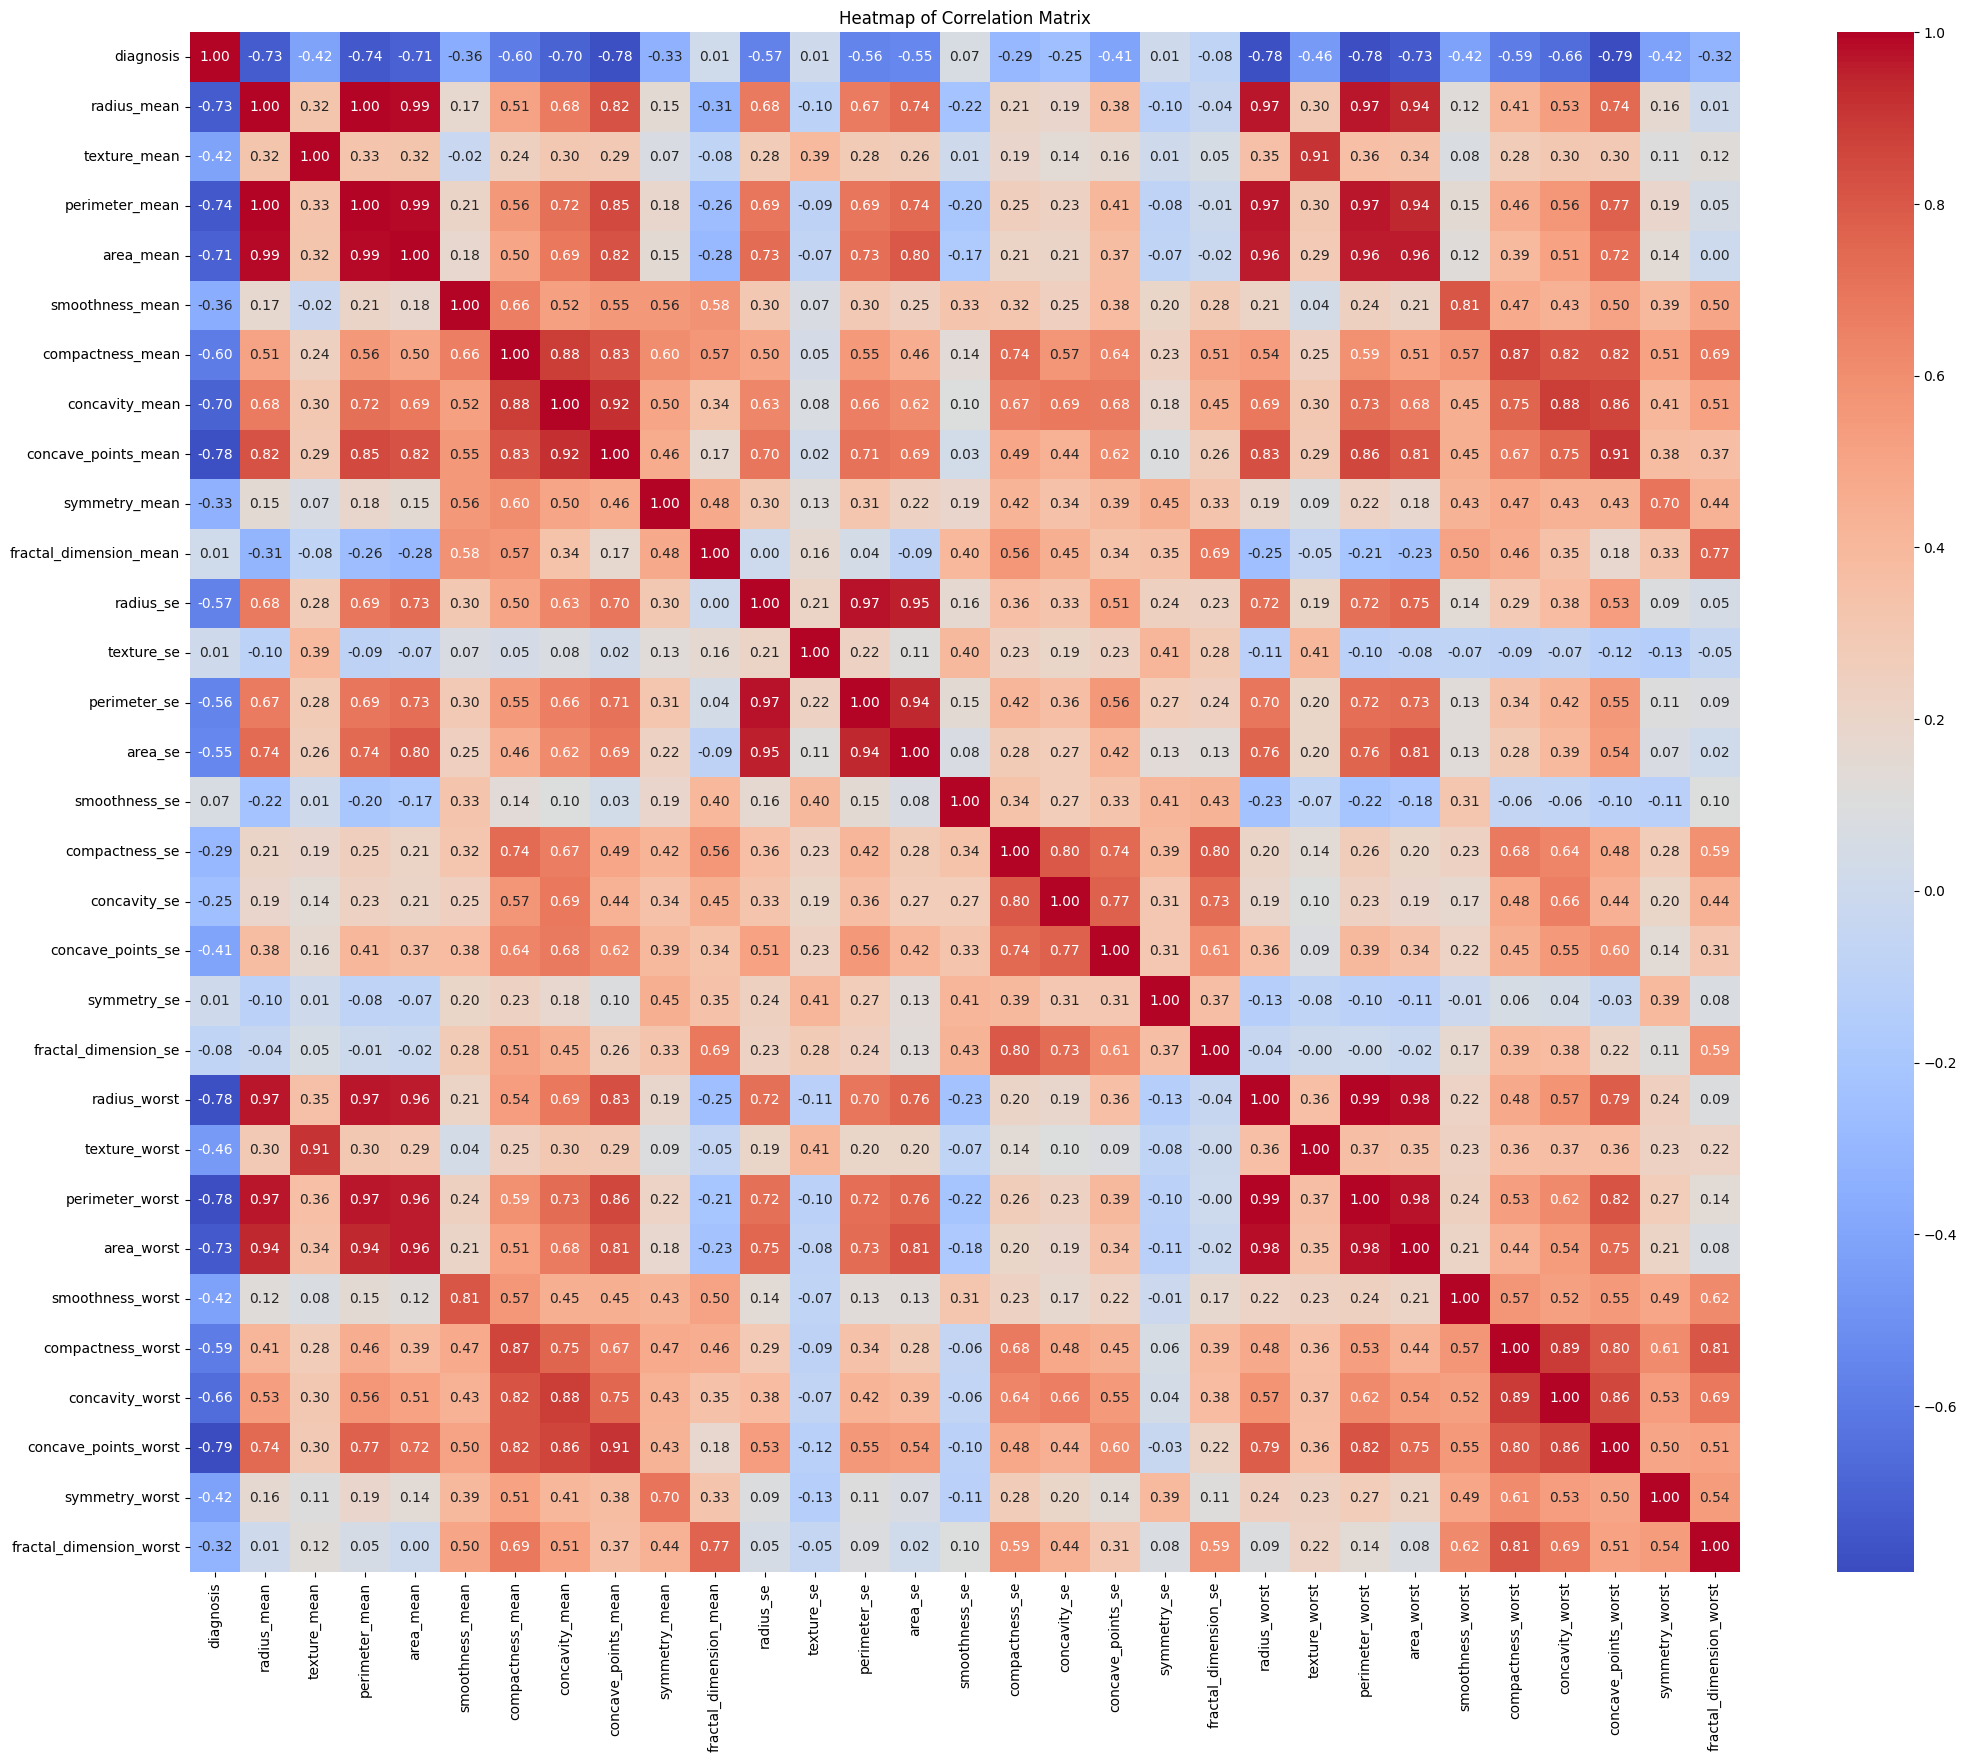

In [10]:
correlation_matrix = data.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

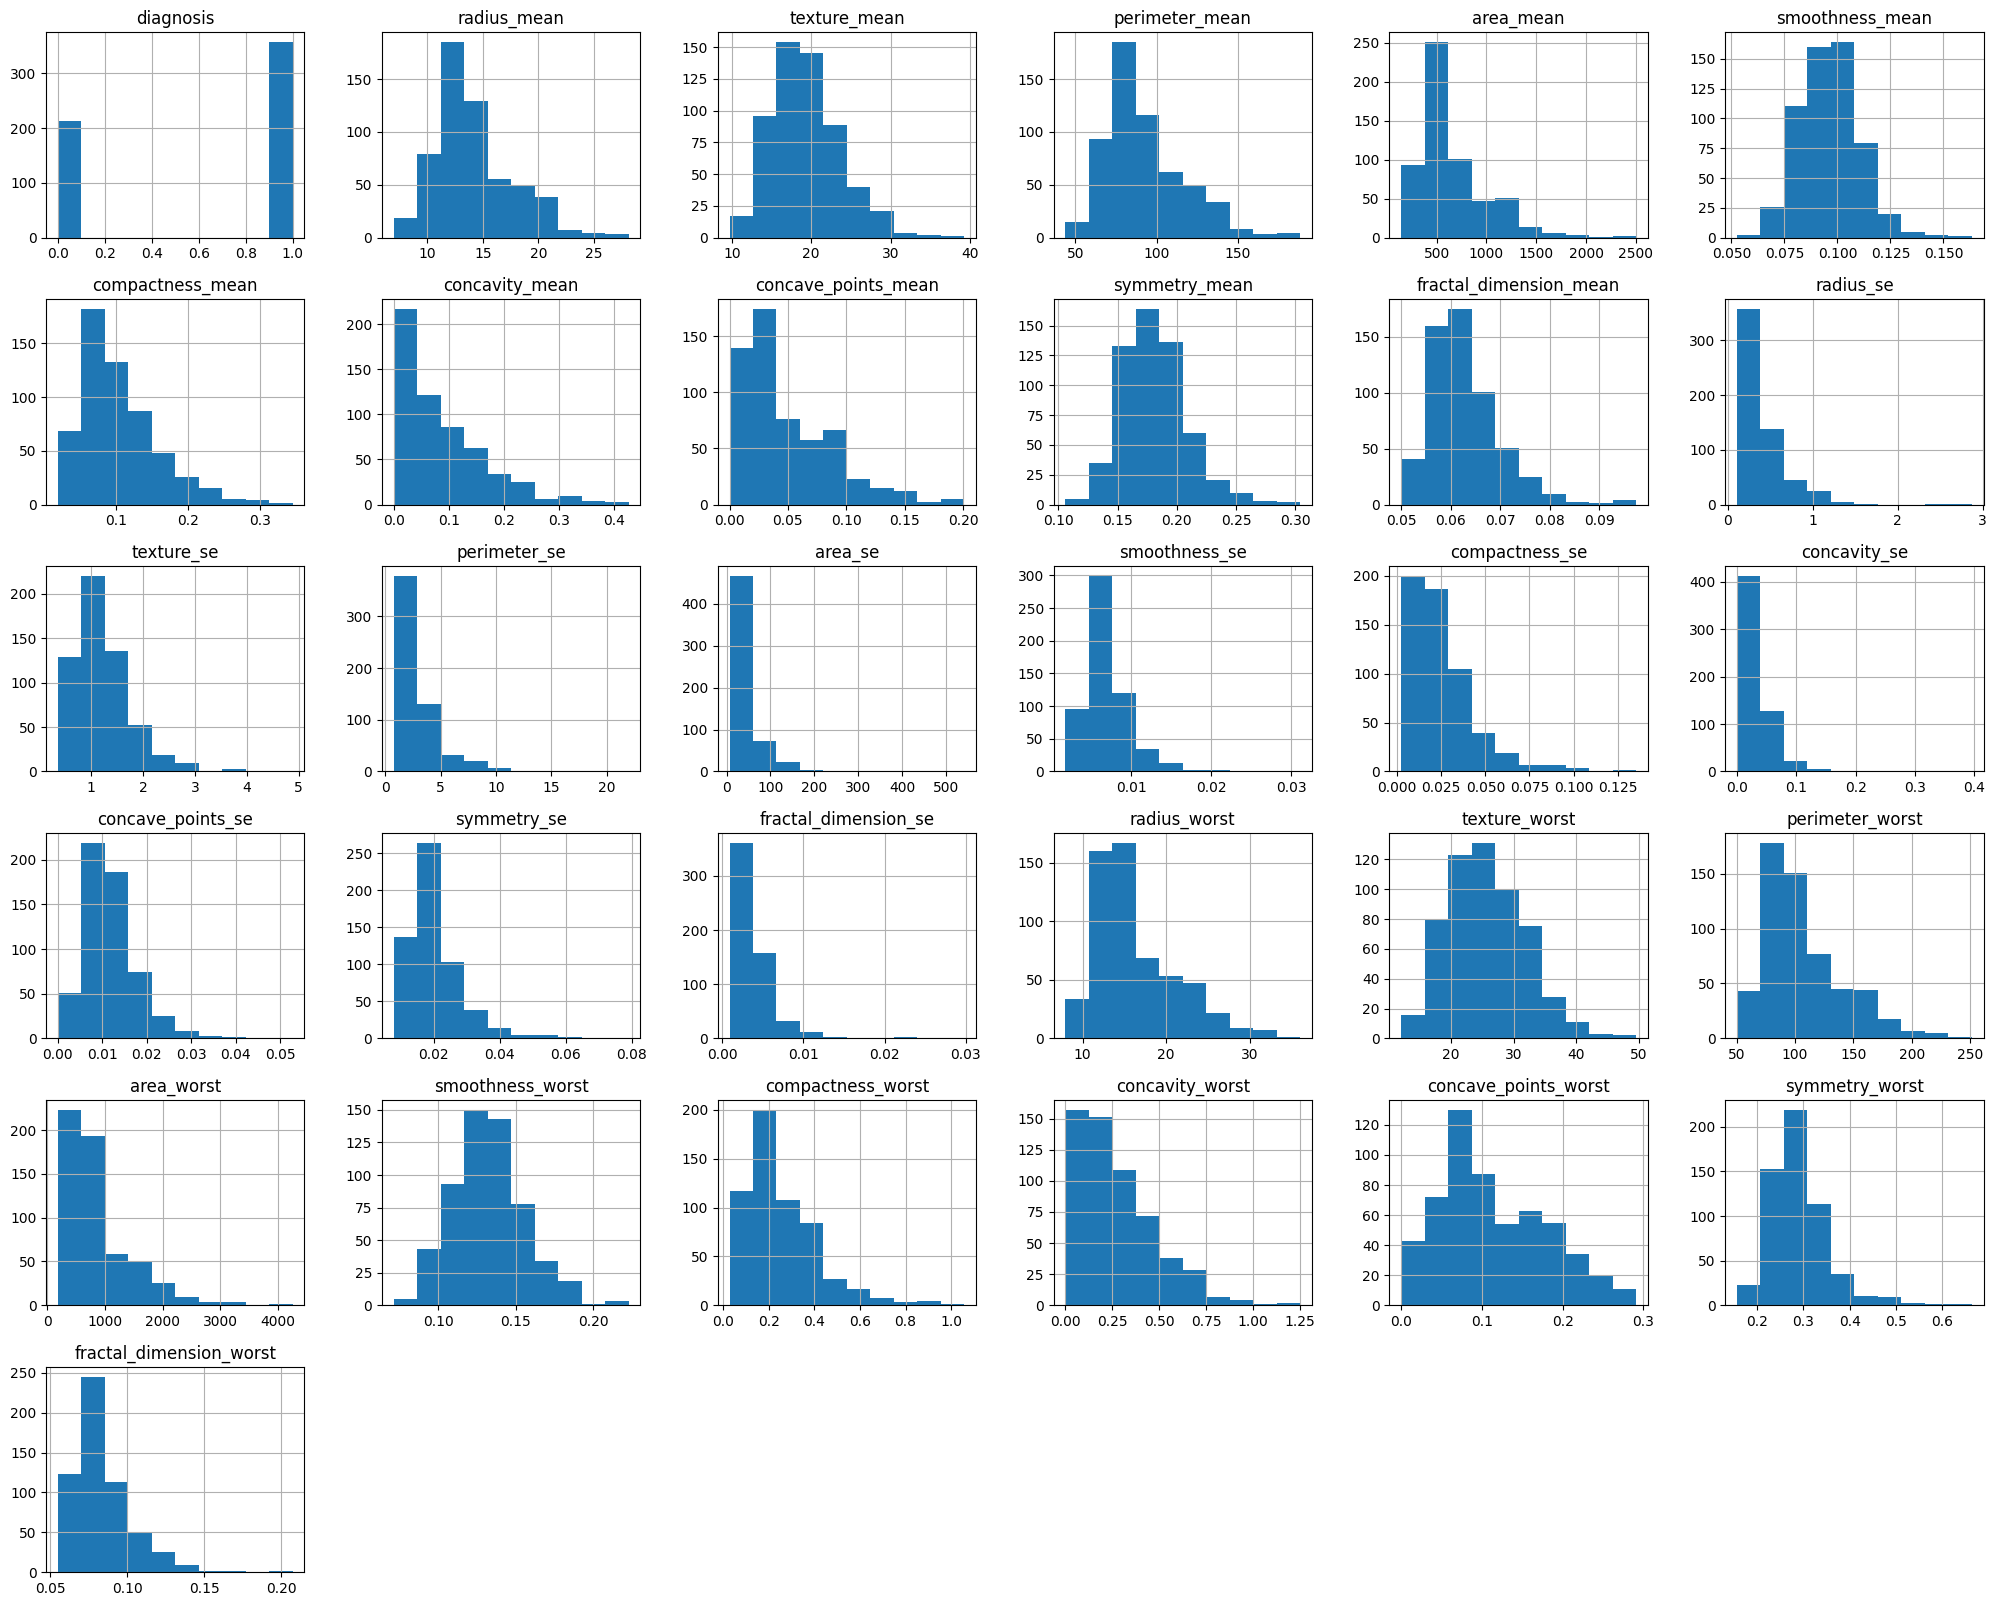

In [11]:
data.hist(bins=10,figsize=(25,20))
plt.show()

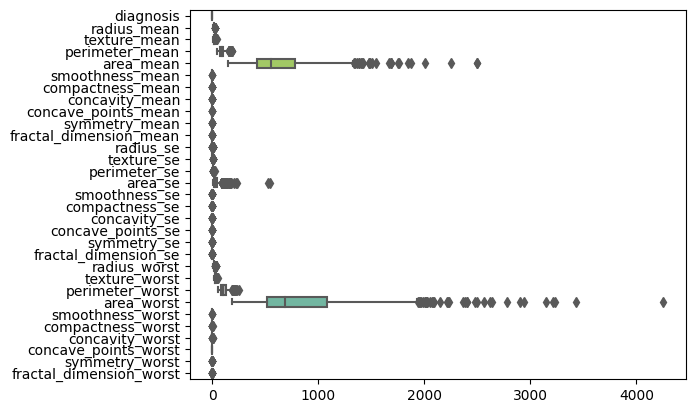

In [12]:
fig, axs = plt.subplots()
sns.boxplot(data=data,orient='h',palette="Set2")
plt.show()

In [13]:
feature_columns = data.columns.tolist()


numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

for feature in numeric_columns:
    q75, q25 = np.percentile(data[feature].dropna(), [75, 25])
    iqr = q75 - q25
    print(f"IQR for {feature}: {iqr}")

    whisker_upper = q75 + (1.5 * iqr)
    data[feature] = data[feature].clip(upper=whisker_upper)
    print(f"Upper whisker for {feature}: {whisker_upper}")

print(data.head())

IQR for diagnosis: 1.0
Upper whisker for diagnosis: 2.5
IQR for radius_mean: 4.08
Upper whisker for radius_mean: 21.9
IQR for texture_mean: 5.629999999999999
Upper whisker for texture_mean: 30.244999999999997
IQR for perimeter_mean: 28.929999999999993
Upper whisker for perimeter_mean: 147.49499999999998
IQR for area_mean: 362.40000000000003
Upper whisker for area_mean: 1326.3000000000002
IQR for smoothness_mean: 0.018930000000000002
Upper whisker for smoothness_mean: 0.133695
IQR for compactness_mean: 0.06547999999999998
Upper whisker for compactness_mean: 0.22861999999999996
IQR for concavity_mean: 0.10114000000000001
Upper whisker for concavity_mean: 0.28241000000000005
IQR for concave_points_mean: 0.053689999999999995
Upper whisker for concave_points_mean: 0.15453499999999998
IQR for symmetry_mean: 0.033800000000000024
Upper whisker for symmetry_mean: 0.24640000000000006
IQR for fractal_dimension_mean: 0.008419999999999997
Upper whisker for fractal_dimension_mean: 0.0787499999999999

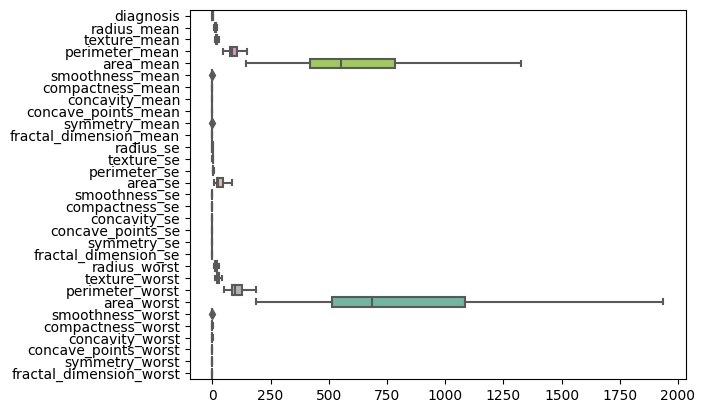

In [14]:
fig, axs = plt.subplots()
sns.boxplot(data=data,orient='h',palette="Set2")
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

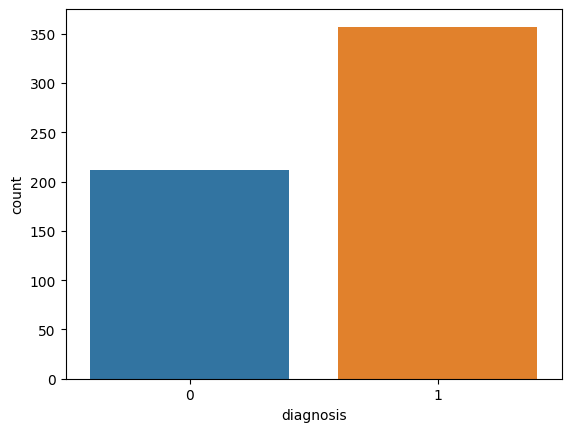

In [15]:
sns.countplot(x='diagnosis',data=data)

In [24]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


smote = SMOTE()
X, y = smote.fit_resample(X, y)


data = pd.DataFrame(X, columns=X.columns)

print("After Balancing:", X.shape, y.shape)


print(data.head())

After Balancing: (714, 30) (714,)
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0         0.118400   
1        20.57         17.77          132.90     1326.0         0.084740   
2        19.69         21.25          130.00     1203.0         0.109600   
3        11.42         20.38           77.58      386.1         0.133695   
4        20.29         14.34          135.10     1297.0         0.100300   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.22862         0.28241              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.22862         0.24140              0.10520         0.2464   
4           0.13280         0.19800              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_wors

In [25]:
X.shape

(714, 30)

In [26]:
y.shape

(714,)

In [27]:
from collections import Counter
print("Class distribution:", Counter(y))

Class distribution: Counter({0: 357, 1: 357})


In [28]:
data = pd.concat([X, y], axis=1)

In [29]:
data.shape

(714, 31)

In [30]:
data.to_csv('newdata.csv', index=False)